In bootstrap methods, you sample from a set of data with replacement.  For example, given data $x_1 \dots x_n$, for $b = 1 \dots B$ let $X_B$ represent a sample of size n taken with replacement.  Consider the mean and variance of these B samples.  representing the bootstrap estimate of the mean at $\bar \theta_B$, we have $E( \bar \theta_B )=\theta$.  As far as variance, let the correlation coefficient between two estimates be $\rho = \text{corr} (\hat \theta_i, \hat \theta_j)$, with $\text{var} (\theta_i)=\sigma.$  Then $$
\text{var} \left( \bar \theta_B \right) = \frac{1-\rho}{B} \sigma^2 +\rho\sigma
$$
The observation about the mean follows from the observation that 
$
E( \bar \theta_B )= \frac{1}{B} B E(\hat  \theta)=\theta.
$
For the variance, let $S_B$ be the sum of of the $\hat \theta_i$, and observe that 
$$
\text{var} \left( \bar \theta_B \right) =E \left( (S_B/B-\mu)^2\right) =\frac{1}{B^2}E( S_B^2-2\mu B S_B+B^2 \mu^2)=\frac{1}{B^2}E( S_B^2-B^2\mu^2)=\frac{1}{B^2}E( S_B^2)-\mu^2.$$
Then, multiply out $S_B^2$ to obtain $$
E( S_B^2)= B E(\hat \theta_i^2)+B(B-1)E(\hat \theta_i \hat \theta_j), 
$$
so that 
$$
\text{var} \left( \bar \theta_B \right)= \frac{1}{B}E (\hat \theta_i^2)-\frac{1}{B}E(\hat \theta_i \hat \theta_j)+E(\hat \theta_i \hat \theta_j)=\frac{1}{B}(\sigma^2+\mu^2) + \left( 1-\frac{1}{B}\right) (\rho \sigma^2+\mu^2),
$$
the last line using the equalities $(E(\hat \theta_i \hat \theta_j)-\mu^2)/\sigma^2=\rho$ and $\sigma^2=E(\hat \theta_i^2)+\mu^2$
For linear statistics, $\rho$ is about 0.5, but there can be an advantage for nonlinear models for which the results are less correlated.  Thus for things like decision trees, we gain a reduction in variance.


sample mean of X =  -0.0492426728176
bootstrap mean of X =  -0.041272246828


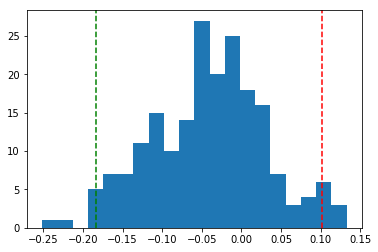

In [6]:
#simple bootstrap example.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

B=200
N=20
X=np.random.randn(N)
print('sample mean of X = ', X.mean())
indiv_est=np.empty(B)
for b in range(B):
    sample = np.random.choice(X,size=B) #default is to sample with replacement
    indiv_est[b]=sample.mean()
    
bmean=indiv_est.mean()
bstd=indiv_est.std()
lower,upper =bmean+norm.ppf(0.025)*bstd, bmean+norm.ppf(0.975)*bstd
print('bootstrap mean of X = ',bmean )
plt.hist(indiv_est,bins=20)
plt.axvline(x=lower,linestyle='--',color='g',label='lower bound for 95% bootstrap')
plt.axvline(x=upper,linestyle='--',color='r',label='upper bound for 95% bootstrap')
plt.show()